# Loading

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# IMPT: make shortcut of the BT4012 Project folder inside your google drive so the stuff below works
drive.mount("/content/drive")
trainData = pd.read_csv("/content/drive/My Drive/BT4012 Project/fraudTrain.csv")
testData = pd.read_csv("/content/drive/My Drive/BT4012 Project/fraudTest.csv")
# trainData = pd.read_csv(r"E:\AY2022-23 Semester 1 Modules\BT4012 - Fraud Analytics\Project Dataset\fraudTrain.csv")
# testData = pd.read_csv(r"E:\AY2022-23 Semester 1 Modules\BT4012 - Fraud Analytics\Project Dataset\fraudTest.csv")

allData = pd.concat([trainData, testData])

Mounted at /content/drive


In [ ]:
def age_group(row):
    rows = row["age"]
    if rows <20:
        return "less than 20"
    elif rows >=20 and rows<30:
        return "20 to 30"
    elif rows >=30 and rows<40:
        return "30 to 40"
    elif rows >=40 and rows<50:
        return "40 to 50"
    elif rows >=50 and rows<60:
        return "50 to 60"
    elif rows >=60 and rows<70:
        return "60 to 70"
    elif rows >=70 and rows<80:
        return "70 to 80"
    elif rows >=80 and rows<90:
        return "80 to 90"
    else:
        return "greater than 90"

In [ ]:
from sklearn.model_selection import train_test_split

# age grp
allData["age"] = pd.DatetimeIndex(allData["trans_date_trans_time"]).year-pd.DatetimeIndex(allData["dob"]).year
allData["age_group"] = allData.apply(age_group,axis=1)

# trans times / age
allData["trans_hour"] = pd.DatetimeIndex(allData["trans_date_trans_time"]).hour
allData["trans_yrmth"] = pd.DatetimeIndex(allData['trans_date_trans_time']).strftime('%Y-%m')

allData["weekday"] = pd.DatetimeIndex(allData["trans_date_trans_time"]).weekday

# drop redundant index column
allData.drop(labels="Unnamed: 0", axis=1, inplace=True)

# calculating the distance between the merchant location and transaction location
allData["latitude_difference"] = abs(allData["lat"]-allData["merch_lat"])
allData["longitude_difference"] = abs(allData["long"]-allData["merch_long"])

# it is estimated that difference between each degree of longitude and lattitude is approximately 69 miles which is 110 km
# applying pythogoras theorem
allData["distance"] = np.sqrt(pow(allData["latitude_difference"]*110,2)+pow(allData["longitude_difference"]*110,2))
allData['distance'].describe()

allData.category = allData.category.astype("category")
allData.gender = allData.gender.astype("category")
allData.state = allData.state.astype("category")
allData.age_group = allData.age_group.astype("category")
allData.trans_yrmth = allData.trans_yrmth.astype("category")
allData.weekday = allData.weekday.astype("category")
allData.job = allData.job.astype("category")
allData.city = allData.city.astype("category")
allData.is_fraud = allData.is_fraud.astype("category")
allData.trans_hour = allData.trans_hour.astype("category")

# category_dummies = pd.get_dummies(allData.category)
# allData = pd.concat([allData, category_dummies], axis=1)

train, others = train_test_split(allData, test_size=0.2, random_state=4012)
del(allData)
validation, test = train_test_split(others, test_size=0.5, random_state=4012)
del(others)

onlyFraud = train[train.is_fraud == 1]
noFraud = train[train.is_fraud != 1]

print(onlyFraud)

       trans_date_trans_time            cc_num  \
288598   2019-05-21 23:40:29  6011438889172900   
644699   2019-10-01 01:45:49   346208242862904   
366597   2019-06-19 01:11:01  6506116513503136   
621562   2019-09-21 17:41:09  3565943051129759   
10057    2019-01-07 04:34:48  3597980945245815   
...                      ...               ...   
205282   2019-04-15 03:05:13  3548710338694745   
389704   2020-11-21 03:17:38    30235268718158   
204807   2020-09-01 01:10:19  4003989662068504   
93343    2019-02-24 22:33:25   180036456789979   
351029   2019-06-14 00:17:50  6011948324228984   

                                  merchant       category     amt      first  \
288598                fraud_Abbott-Steuber  personal_care   20.17    Allison   
644699                   fraud_Collier Inc    grocery_net   10.54    Tabitha   
366597               fraud_Dooley-Thompson       misc_net  773.63   Kimberly   
621562                     fraud_Lynch Ltd   shopping_pos  905.66      David   

# Dropping

In [ ]:
train.drop(["trans_date_trans_time", "first", "last", "unix_time", "street", "cc_num", "merchant", "age", "city_pop", "zip", "dob", "trans_num"], axis=1, inplace=True)
train.drop(["lat","long","merch_lat","merch_long","latitude_difference","longitude_difference"], axis=1, inplace=True)

validation.drop(["trans_date_trans_time", "first", "last", "unix_time", "street", "cc_num", "merchant", "age", "city_pop", "zip", "dob", "trans_num"], axis=1, inplace=True)
validation.drop(["lat","long","merch_lat","merch_long","latitude_difference","longitude_difference"], axis=1, inplace=True)

test.drop(["trans_date_trans_time", "first", "last", "unix_time", "street", "cc_num", "merchant", "age", "city_pop", "zip", "dob", "trans_num"], axis=1, inplace=True)
test.drop(["lat","long","merch_lat","merch_long","latitude_difference","longitude_difference"], axis=1, inplace=True)

train

,category,amt,gender,city,state,job,is_fraud,age_group,trans_hour,trans_yrmth,weekday,distance
1089385,shopping_net,9.11,M,Pembroke,NC,Hospital doctor,0,60 to 70,7,2020-03,6,88.270416
396245,gas_transport,75.57,F,Centerview,MO,Electronics engineer,0,30 to 40,1,2019-06,6,117.115063
816379,misc_net,390.37,M,Oakland,TN,Furniture conservator/restorer,0,20 to 30,5,2019-12,6,56.383604
476241,shopping_pos,96.55,F,Lakeport,CA,Podiatrist,0,40 to 50,12,2020-12,0,108.142655
567642,kids_pets,13.78,M,San Antonio,TX,Exhibition designer,0,40 to 50,20,2019-08,3,98.590270
...,...,...,...,...,...,...,...,...,...,...,...,...
1286615,misc_pos,6.88,F,Sutherland,NE,Insurance broker,0,30 to 40,23,2020-06,1,62.997041
926319,shopping_net,98.85,F,Steuben,ME,Make,0,60 to 70,3,2020-01,3,122.501992
83164,misc_pos,10.48,F,Tulsa,OK,Bookseller,0,50 to 60,9,2020-07,0,82.202315
301454,travel,6.45,F,Allentown,PA,"Scientist, research (maths)",0,20 to 30,23,2019-05,6,22.751546


# Models

In [ ]:
from math import sqrt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Track the performance of various models
performance_tracker = pd.DataFrame(columns=["Model Name", "Training Time", "Accuracy", "Recall", "Precision", "F1", "ROC AUC"])

# Always predict No Default
y_pred = pd.Series(0).repeat(validation.is_fraud.size)
performance_tracker.loc["Naive Model (Always No Default)"] = ["Naive Model (Always No Default)", 0.0, accuracy_score(validation.is_fraud, y_pred), recall_score(validation.is_fraud, y_pred), precision_score(validation.is_fraud, y_pred), f1_score(validation.is_fraud, y_pred), roc_auc_score(validation.is_fraud, y_pred)]

# Always predict Default
y_pred = pd.Series(1).repeat(validation.is_fraud.size)
performance_tracker.loc["Naive Model (Always Default)"] = ["Naive Model (Always Default)", 0.0, accuracy_score(validation.is_fraud, y_pred), recall_score(validation.is_fraud, y_pred), precision_score(validation.is_fraud, y_pred), f1_score(validation.is_fraud, y_pred), roc_auc_score(validation.is_fraud, y_pred)]

performance_tracker

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model Name,Training Time,Accuracy,Recall,Precision,F1,ROC AUC
Naive Model (Always No Default),Naive Model (Always No Default),0.0,0.994726,0.0,0.000000,0.000000,0.5
Naive Model (Always Default),Naive Model (Always Default),0.0,0.005274,1.0,0.005274,0.010493,0.5


# LGBM Grid Search on Validation Set

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.linear_model import LogisticRegression
import time
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

x_train = train[train.columns[~train.columns.isin(["is_fraud"])]]
x_validation = validation[validation.columns[~validation.columns.isin(["is_fraud"])]]

# Define the model pipeline
pipeline = Pipeline(steps=[
    ("lgbm_classifier", LGBMClassifier(class_weight="balanced", random_state=4012))
])

# Configure grid search CV
param_grid = {
    "lgbm_classifier__num_leaves" : [30],
    "lgbm_classifier__n_estimators" : [1250, 1300]
    # "lgbm_classifier__max_depth": [8]
    # "lgbm_classifier__boosting" : ["gbdt", "rf", "dart", "goss"]
}
search = GridSearchCV(pipeline, param_grid, cv=5, scoring="f1", n_jobs=-1)

# Train the model
time_start = time.perf_counter()

search.fit(x_train, train.is_fraud)

training_time = time.perf_counter() - time_start
training_time

# Generate predictions on validation data
y_pred = pd.Series(search.predict(x_validation))
y_pred

# Evaluate and record model performance
performance_tracker.loc["LGBM with GridSearchCV"] = ["LGBM with GridSearchCV", training_time, accuracy_score(validation.is_fraud, y_pred), recall_score(validation.is_fraud, y_pred), precision_score(validation.is_fraud, y_pred), f1_score(validation.is_fraud, y_pred), roc_auc_score(validation.is_fraud, y_pred)]
performance_tracker

,Model Name,Training Time,Accuracy,Recall,Precision,F1,ROC AUC
Naive Model (Always No Default),Naive Model (Always No Default),0.000000,0.994726,0.000000,0.000000,0.000000,0.500000
Naive Model (Always Default),Naive Model (Always Default),0.000000,0.005274,1.000000,0.005274,0.010493,0.500000
LGBM,LGBM,238.195655,0.999287,0.933884,0.930041,0.931959,0.966758
LGBM with GridSearchCV,LGBM with GridSearchCV,1941.934699,0.999266,0.921187,0.938478,0.929752,0.960434


### The screenshots below contain a portion of the grid search process

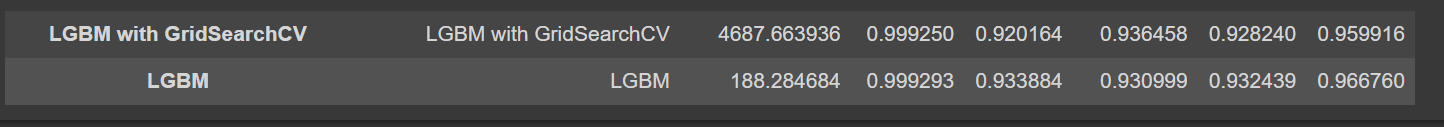
param_grid = {
    "lgbm_classifier__num_leaves" : [25, 30],
    "lgbm_classifier__n_estimators" : [1000, 1250],
    "lgbm_classifier__max_depth": [6, 9]
}
best_params_ = {
 'lgbm_classifier__max_depth': 9,
 'lgbm_classifier__n_estimators': 1250,
 'lgbm_classifier__num_leaves': 30
 }

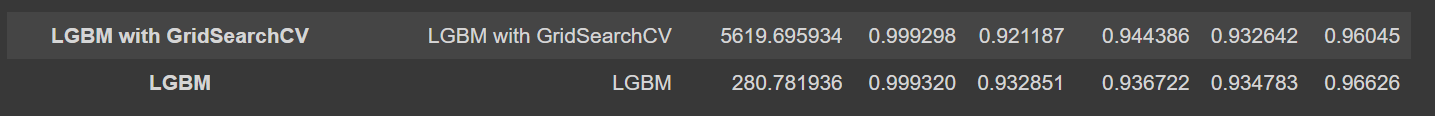

param_grid = {
    "lgbm_classifier__num_leaves" : [29, 30, 31],
    "lgbm_classifier__n_estimators" : [1250],
    "lgbm_classifier__max_depth": [8, 9]
}
{'lgbm_classifier__max_depth': 8,
 'lgbm_classifier__n_estimators': 1250,
 'lgbm_classifier__num_leaves': 30}


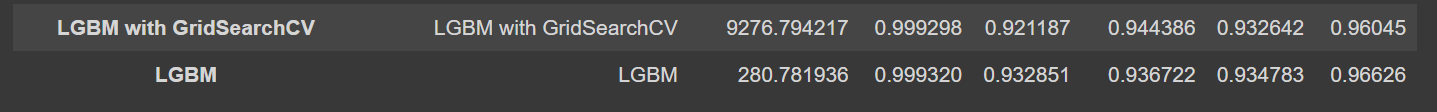
param_grid = {
    "lgbm_classifier__num_leaves" : [29, 30],
    "lgbm_classifier__n_estimators" : [1250, 2000],
    "lgbm_classifier__max_depth": [7, 8]
}
{'lgbm_classifier__max_depth': 8,
 'lgbm_classifier__n_estimators': 1250,
 'lgbm_classifier__num_leaves': 30}

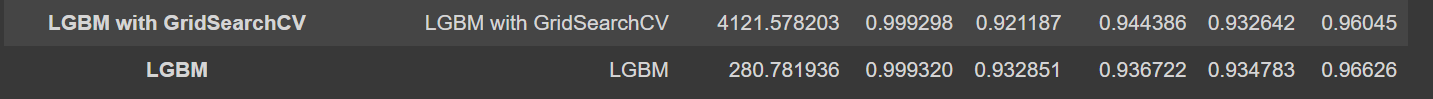
param_grid = {
    "lgbm_classifier__num_leaves" : [29, 30],
    "lgbm_classifier__n_estimators" : [1250, 1500],
    "lgbm_classifier__max_depth": [8]
}
{'lgbm_classifier__max_depth': 8,
 'lgbm_classifier__n_estimators': 1250,
 'lgbm_classifier__num_leaves': 30}

In [ ]:
search.best_params_

### Here we experimented with the alternative boosting algorithms available in LGBM

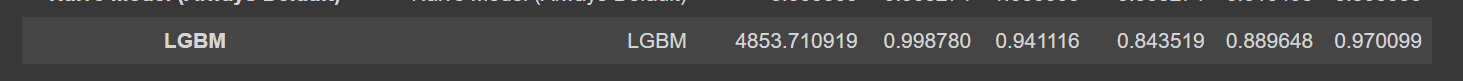

DART BOOSTING

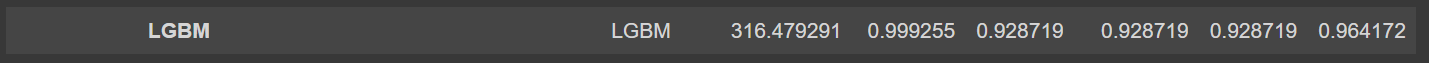

GOSS

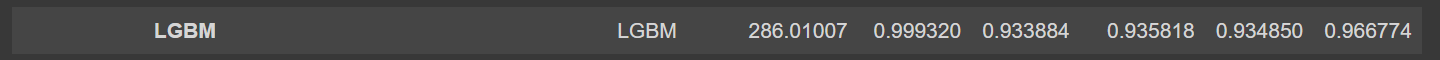
1285

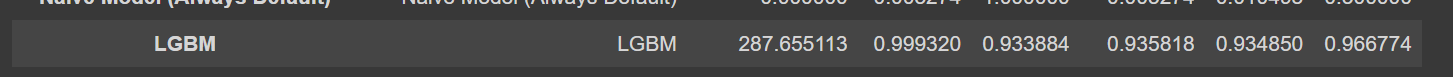

1275

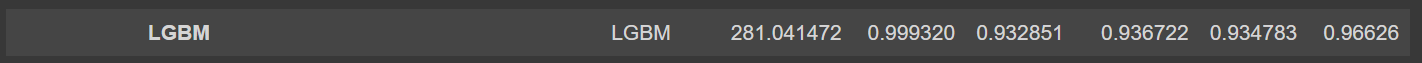
1260

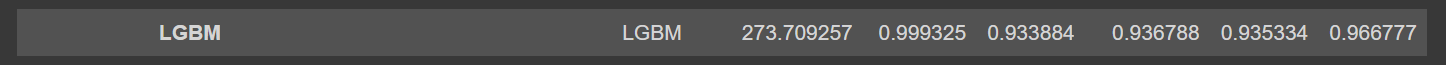
1225

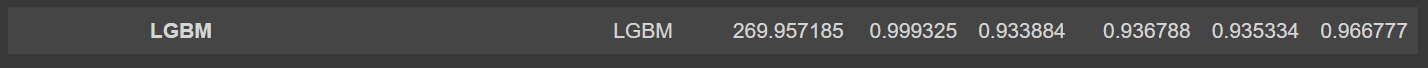
1220

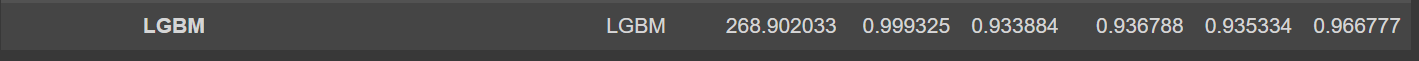
1215